 # Advance Data Science Lab 2
 # Feature Engineering on Image
 ### Name: Tejas Yogesh Pawar
 ### PRN: 20190802021
 ==============================================================================================

**Aim: To Study And Perform Low-Level Feature Extraction On Image Data.**

# **Edge Detection using Prewitt filter**

Edge detection is an image processing technique for finding the boundaries of objects within images. It works by detecting discontinuities in brightness. Edge detection is used for image segmentation and data extraction in areas such as image processing, computer vision, and machine vision.

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pylab as plt
img = cv2.imread('/content/Vegetable Image.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

Original image


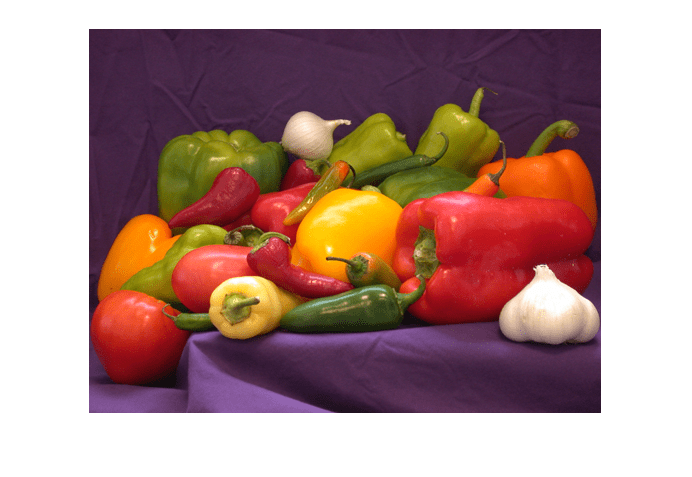

In [2]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
print("Original image")
cv2_imshow(img)


Prewitt X


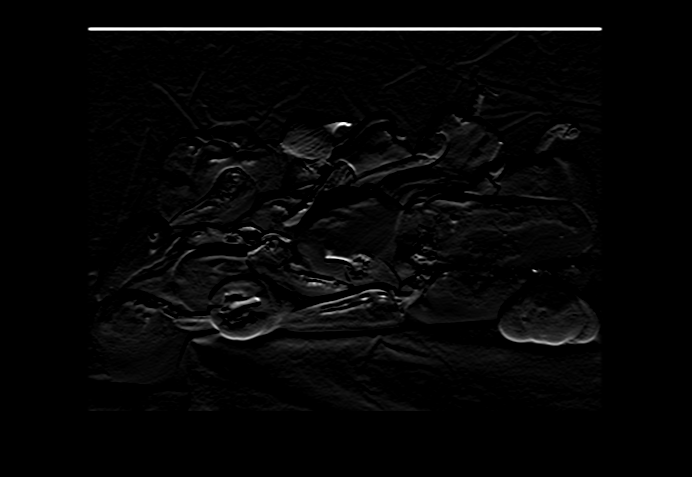

In [3]:
print("Prewitt X")
cv2_imshow(img_prewittx)

Prewitt Y


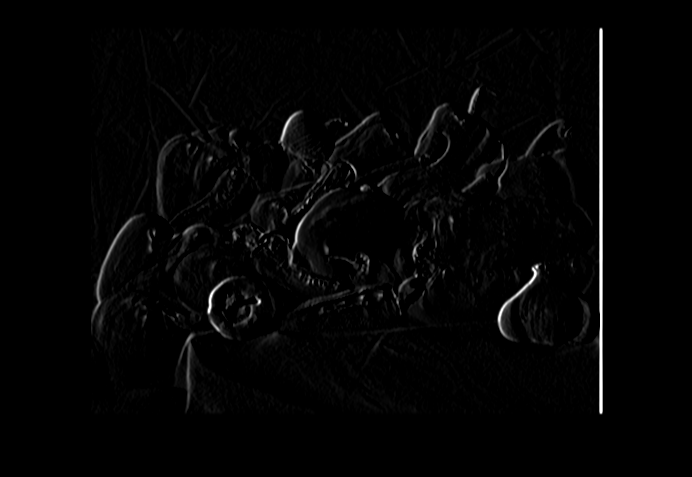

In [4]:
print("Prewitt Y")
cv2_imshow(img_prewitty)


Prewitt


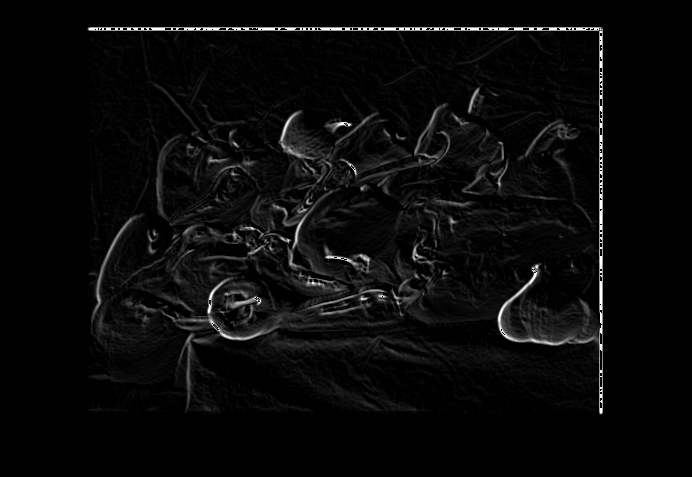

In [5]:
print("Prewitt")
cv2_imshow(img_prewittx + img_prewitty)

# **Canny edge detection**

Edge detection is a process that involves mathematical methods to find points in an image where the brightness of pixel intensities clearly changes or we can say that it is an image processing technique for finding the boundaries of objects within images. It works by detecting discontinuities in brightness.

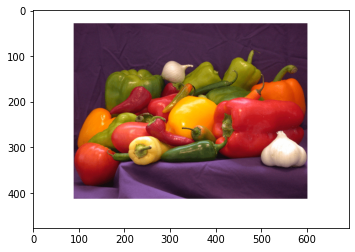

In [6]:
# Import libraries required to do operations like convolution, gaussian blur, sobel operat
import imageio
from scipy import misc
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
# Load image into variable and display it
lion = imageio.imread("/content/Vegetable Image.png") # Paste address of image
plt.imshow(lion, cmap = plt.get_cmap('gray'))
plt.show()

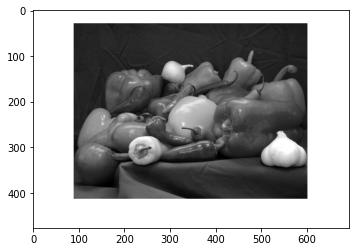

In [7]:
# Convert color image to grayscale to help extraction of edges and plot it
lion_gray = np.dot(lion[...,:3], [0.299, 0.587, 0.114])
#lion_gray = lion_gray.astype('int32')
plt.imshow(lion_gray, cmap = plt.get_cmap('gray'))
plt.show()


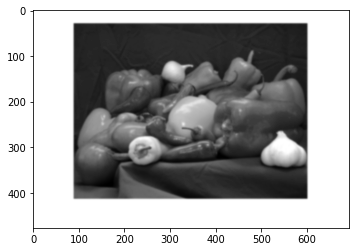

In [8]:
# Blur the grayscale image so that only important edges are extracted and the noisy ones i
lion_gray_blurred = ndimage.gaussian_filter(lion_gray, sigma=1.4) # Note that the value of
plt.imshow(lion_gray_blurred, cmap = plt.get_cmap('gray'))
plt.show()

Apply Sobel Filter using the convolution operation Note that in this case I have used the filter to
have a maximum amgnitude of 2, but it can also be changed to other numbers for aggressive
edge extraction For eg [-1,0,1], [-5,0,5], [-1,0,1]

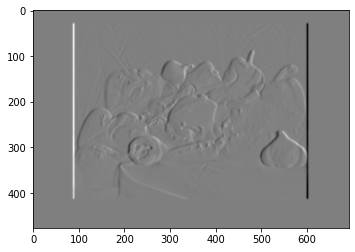

In [17]:
def SobelFilter(img, direction):
 if(direction == 'x'):
  Gx = np.array([[-1,0,+1], [-2,0,+2], [-1,0,+1]])
  Res = ndimage.convolve(img, Gx)
  #Res = ndimage.convolve(img, Gx, mode='constant', cval=0.0)

 if(direction == 'y'):
  Gy = np.array([[-1,-2,-1], [0,0,0], [+1,+2,+1]])
  Res = ndimage.convolve(img, Gy)
  #Res = ndimage.convolve(img, Gy, mode='constant', cval=0.0)
 return Res

# Normalize the pixel array, so that values are <= 1
def Normalize(img):
 #img = np.multiply(img, 255 / np.max(img))
 img = img/np.max(img)
 return img
 
# Apply Sobel Filter in X direction
gx = SobelFilter(lion_gray_blurred, 'x')
gx = Normalize(gx)
plt.imshow(gx, cmap = plt.get_cmap('gray'))
plt.show()
 

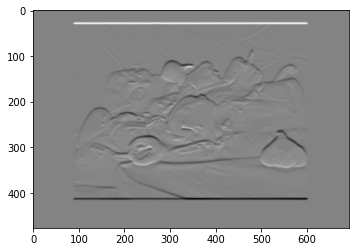

In [18]:
# Apply Sobel Filter in Y direction
gy = SobelFilter(lion_gray_blurred, 'y')
gy = Normalize(gy)
plt.imshow(gy, cmap = plt.get_cmap('gray'))
plt.show()

Apply the Sobel Filter using the inbuilt function of scipy, this was done to verify the values
obtained from above Also differnet modes can be tried out for example as given below: dx =
ndimage.sobel(lion_gray_blurred, axis=1, mode='constant', cval=0.0) # horizontal derivative dy =
ndimage.sobel(lion_gray_blurred, axis=0, mode='constant', cval=0.0) # vertical derivative

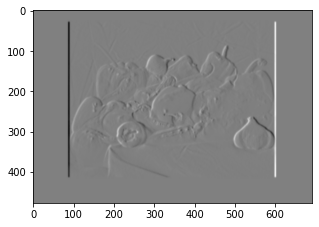

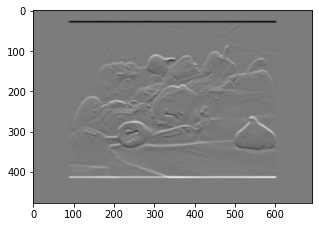

In [19]:
dx = ndimage.sobel(lion_gray_blurred, axis=1) # horizontal derivative
dy = ndimage.sobel(lion_gray_blurred, axis=0) # vertical derivative
# Plot the derivative filter values obtained using the inbuilt function
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(dx, cmap = plt.get_cmap('gray'))
plt.figure(figsize=(11,6))
plt.subplot(122), plt.imshow(dy, cmap = plt.get_cmap('gray'))
plt.show()


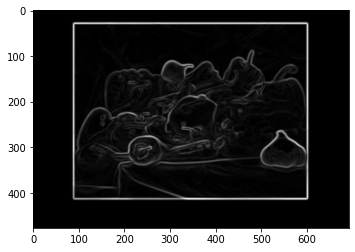

In [20]:
# Calculate the magnitude of the gradients obtained
Mag = np.hypot(gx,gy)
Mag = Normalize(Mag)
plt.imshow(Mag, cmap = plt.get_cmap('gray'))
plt.show()


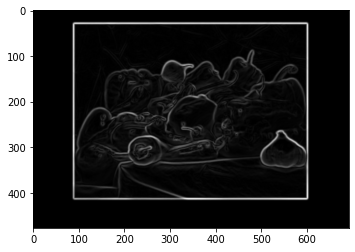

In [21]:
# Calculate the magnitude of the gradients obtained using the inbuilt function, again done
mag = np.hypot(dx,dy)
mag = Normalize(mag)
plt.imshow(mag, cmap = plt.get_cmap('gray'))
plt.show()

In [22]:
# Calculate direction of the gradients
Gradient = np.degrees(np.arctan2(gy,gx))
# Calculate the direction of the gradients obtained using the inbuilt sobel function
gradient = np.degrees(np.arctan2(dy,dx))

Do Non Maximum Suppression with interpolation to get a better estimate of the magnitude
values of the pixels in the gradient direction. This is done to get thin edges.

# **Laplacian of Gaussian**

The Laplacian of Gaussian is useful for detecting edges that appear at various image scales or degrees of image focus. The exact values of sizes of the two kernels that are used to approximate the Laplacian of Gaussian will determine the scale of the difference image, which may appear blurry as a result.

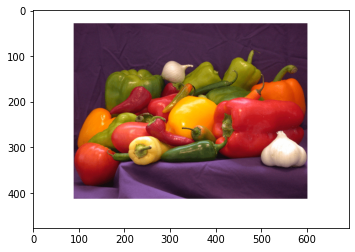

In [35]:
import scipy as sp
import numpy as np
import imageio
import scipy.ndimage as nd
import matplotlib.pyplot as plt
face=imageio.imread("/content/Vegetable Image.png")
plt.imshow(face)


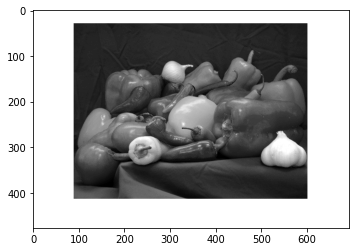

In [36]:
gray=imageio.imread('/content/Vegetable Image.png',pilmode='L')
plt.imshow(gray,cmap=plt.get_cmap('gray'))

In [37]:
LoG = nd.gaussian_laplace(gray, 2)
thres = np.absolute(LoG).mean() * 0.75
output = sp.zeros(LoG.shape)
w = output.shape[1]
h = output.shape[0]

for y in range(1, h - 1):
  for x in range(1, w - 1):
    patch = LoG[y-1:y+2, x-1:x+2]
    p = LoG[y, x]
    maxP = patch.max()
    minP = patch.min()
    if (p > 0):
      zeroCross = True if minP < 0 else False
    else:
      zeroCross = True if maxP > 0 else False
    if ((maxP - minP) > thres) and zeroCross:
      output[y, x] = 1
    



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  This is separate from the ipykernel package so we can avoid doing imports until


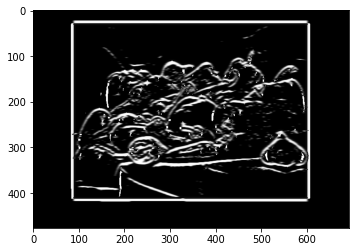

In [38]:
plt.imshow(LoG,cmap=plt.get_cmap('gray'))


# **Perform and comparison between Gradient-based and Gaussian-based operatoras**

Gradient-based operator


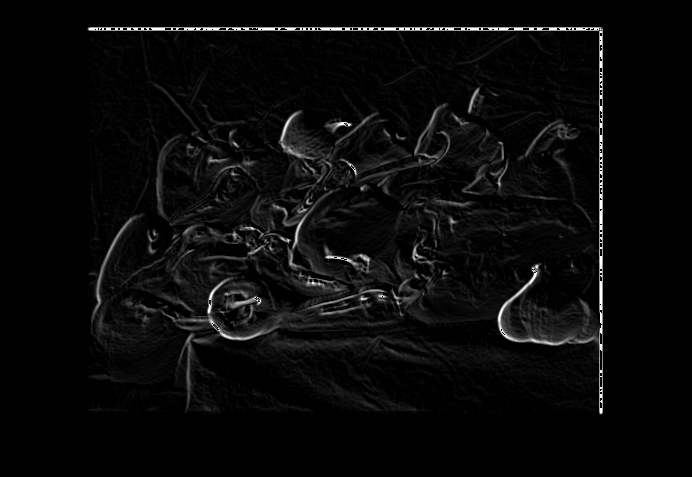

In [39]:
print("Gradient-based operator")
cv2_imshow(img_prewittx + img_prewitty)

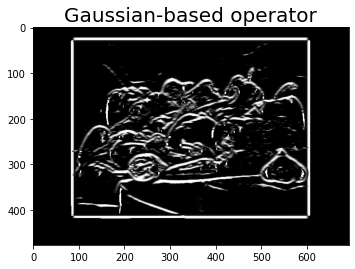

In [40]:
plt.title('Gaussian-based operator', size=20)
plt.imshow(LoG,cmap=plt.get_cmap('gray'))
